## 实验题目3 四阶龙格-库塔(Runge-Kutta)方法

### 参考资料

julia ordinary differential equations tutorial https://diffeq.sciml.ai/stable/tutorials/ode_example/

intro to solving differential equations in julia https://www.youtube.com/watch?v=KPEqYtEd-zY

julia ode solver type: Runge-Kutta https://diffeq.sciml.ai/stable/solvers/ode_solve/#Explicit-Runge-Kutta-Methods

julia ode problem type https://diffeq.sciml.ai/stable/types/ode_types/#ode_prob

julia ode speed up perf https://diffeq.sciml.ai/stable/features/performance_overloads/#performance_overloads

julia ode common solver option https://diffeq.sciml.ai/stable/basics/common_solver_opts/#solver_options



### 代码实现

In [85]:
using DifferentialEquations
using Plots
using LaTeXStrings
using Statistics
using ImplicitEquations

In [86]:
function rungekutta(f::Function, xspan, y0, num)
    a, b = xspan
    x0 = a
    h = (b - a) / num
    xs, ys = zeros(num), zeros(num)
    for n = 1:num
        K1 = h * f(x0, y0)
        K2 = h * f(x0 + h / 2, y0 + K1 / 2)
        K3 = h * f(x0 + h / 2, y0 + K2 / 2)
        K4 = h * f(x0 + h, y0 + K3)
        x1 = x0 + h
        y1 = y0 + 1 / 6 * (K1 + 2K2 + 2K3 + K4)
        xs[n], ys[n] = x0, y0 = x1, y1
    end
    println("Runge-Kutta:")
    println("x: $xs")
    println("y: $ys")
    xs, ys
end

rungekutta (generic function with 1 method)

### 测试代码

#### Test 1 - Simple

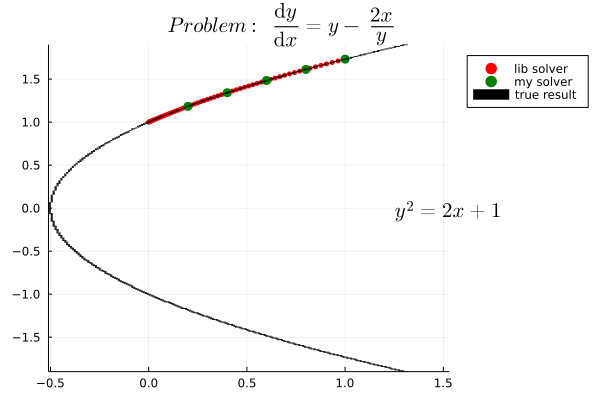

Runge-Kutta:
x: [0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
y: [1.183229287445307, 1.3416669298526065, 1.4832814583502616, 1.6125140416775265, 1.7321418826911932]


In [87]:
f(y, p, x) = y - 2x / y
xspan = (0.0, 1.0)
y0 = 1.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(title=L"~~~~~~~~~~~~ Problem:\ \frac{\mathrm{d} y}{\mathrm{d} x}=y-\frac{2x}{y}")
plot!(sol.t, sol.u, seriestype=:scatter, markersize=3, msw=0, color=:red, label="lib solver")

f(x, y) = y - 2x / y
# xspan = (0.0, 1.0)
# y0 = 1.0
num = convert(Integer, 1.0 / 0.2)
xs, ys = rungekutta(f, xspan, y0, 5)

p = plot!(xs, ys, seriestype=:scatter, markersize=5, msw=0, color=:green, label="my solver")
# display(p)
f(x, y) = y^2 - 2x - 1
p = plot!(f ⩵ 0.0, color=:green, linewidth=0.1, label="true result")  # \Equal[Tab]
p = plot!(legend=:outertopright, xlim=(-0.51, 1.53), ylim=(-1.9, 1.9))
x = xlims(p)[2]
y = mean(ylims(p))
ymax = ylims(p)[2]
annotate!(x, y, L"y^2=2x+1", :black)
display(p)

### 实验题目

In [88]:
function show_plot(p, f::Function, tspan, u0::Float64, reltol, abstol, dense::Bool)
    prob = ODEProblem(f, u0, tspan)
    alg = RK4()
    sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
    if dense
        plot!(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="lib solver")
    else
        plot!(sol.t, sol.u, seriestype=:scatter, markersize=2, msw=0, color=:red, label="lib solver")
    end
end
function show_plot(p, f::Function, xspan, y0::Float64, iternum::Integer)
    xs, ys = rungekutta(f, xspan, y0, iternum)
    plot!(xs, ys, seriestype=:scatter, markersize=4, msw=0, color=:green, label="my solver")
end
function show_plot(p, f::Function, show::Bool, text)
    x = xlims(p)[2]
    y = mean(ylims(p))
    annotate!(x, y, text, :black)
    if show
        p = plot!(f, color=:blue, label="true result")
    else
        p = plot!(f, color=:blue, label="true result")
    end
    p
end
function show_result(f1::Function, f2::Function, f3::Function, xspan, y0, iternums, show::Bool, dense::Bool, title, text)
    println("\n" * title)
    for iternum in iternums
        print("Iternum: $iternum\t")
        p = plot(legend=:outertopright, title=L"~~~~~~~~~~~~~~~~~~~~" * title)
        p = show_plot(p, f1, xspan, y0, 1e-8, 1e-8, dense)
        p = show_plot(p, f2, xspan, y0, iternum)
        p = show_plot(p, f3, show, text)
        display(p)
    end
end

show_result (generic function with 1 method)

#### 问题 1

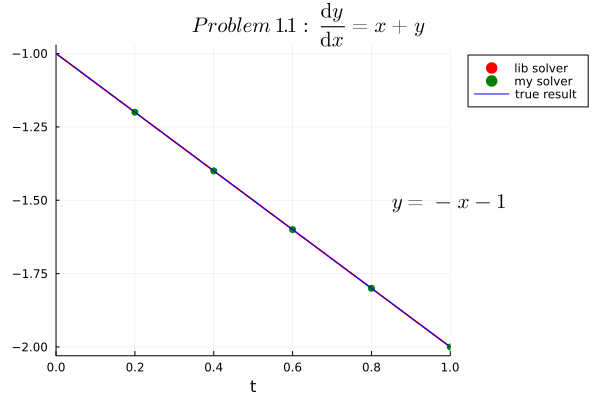

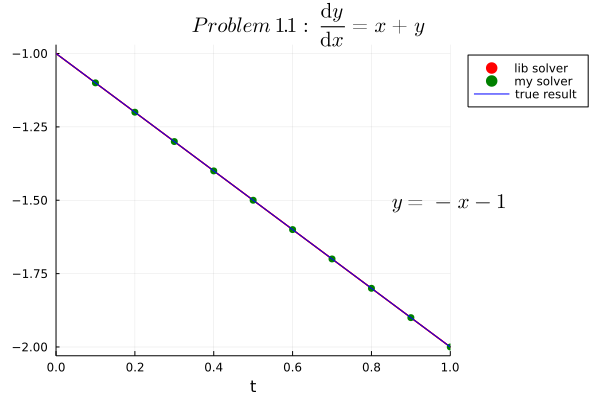

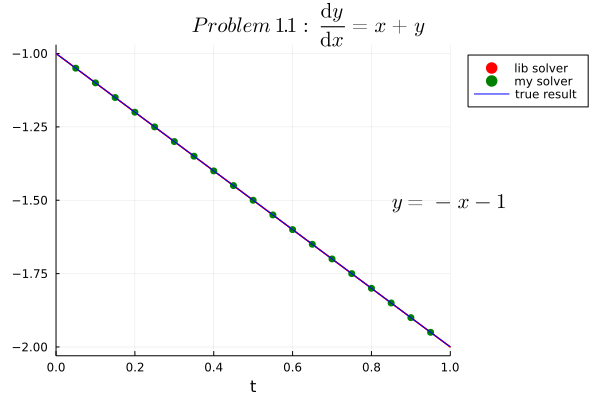

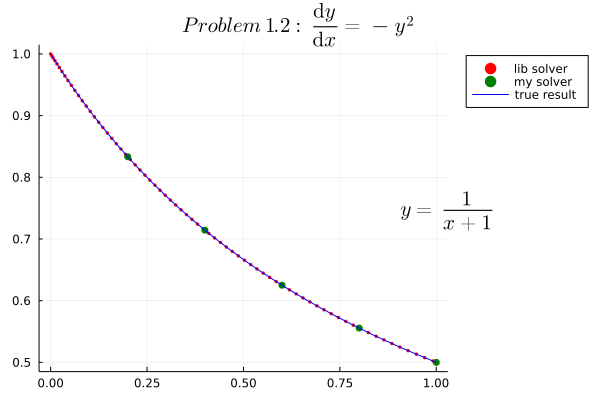

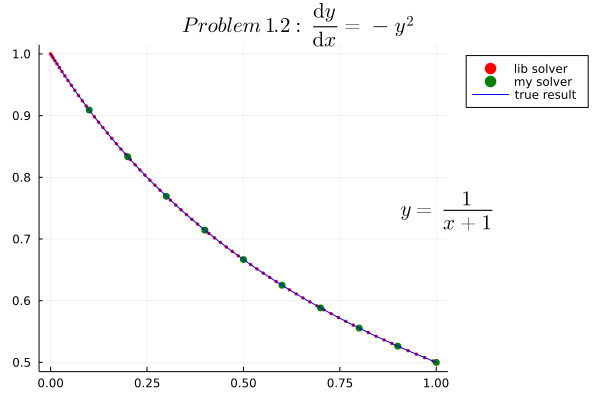

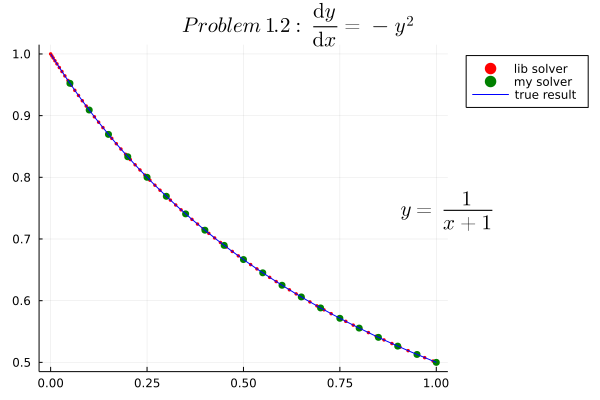


$Problem\ 1.1: \frac{\mathrm{d} y}{\mathrm{d} x} = x + y$
Iternum: 5	Runge-Kutta:
x: [0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
y: [-1.2, -1.4, -1.5999999999999999, -1.7999999999999998, -1.9999999999999998]
Iternum: 10	Runge-Kutta:
x: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
y: [-1.1, -1.2000000000000002, -1.3000000000000003, -1.4000000000000004, -1.5000000000000004, -1.6000000000000005, -1.7000000000000006, -1.8000000000000007, -1.9000000000000008, -2.000000000000001]
Iternum: 20	Runge-Kutta:
x: [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
y: [-1.05, -1.1, -1.1500000000000001, -1.2000000000000002, -1.2500000000000002, -1.3000000000000003, -1.3500000000000003, -1.40000000000000

In [89]:
iternums = [5, 10, 20]

f1(y, p, x) = x + y    # lib RK4() solver
xspan = (0.0, 1.0)
y0 = -1.0
f2(x, y) = x + y       # my rungekutta() solver
f3(x) = -x - 1         # true result 
show_result(f1, f2, f3, xspan, y0, iternums, true, true, L"Problem\ 1.1: \frac{\mathrm{d} y}{\mathrm{d} x} = x + y", L"y = -x - 1") # show=true, dense=true

f1(y, p, x) = -y^2
xspan = (0.0, 1.0)
y0 = 1.0
f2(x, y) = -y^2
f3(x) = 1 / (x + 1)
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 1.2: \frac{\mathrm{d} y}{\mathrm{d} x} = -y^2",L"y = \frac{1}{x + 1}") # show=true, dense=true


#### 问题 2

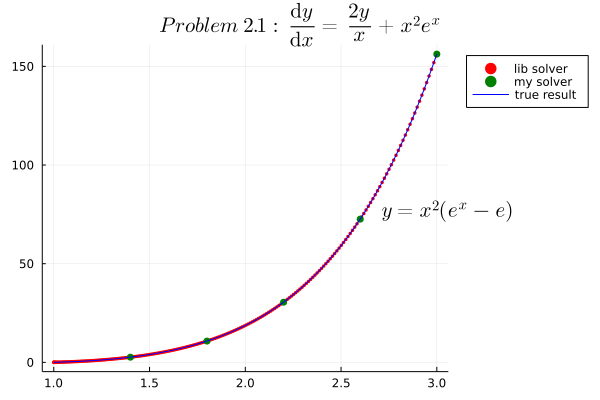

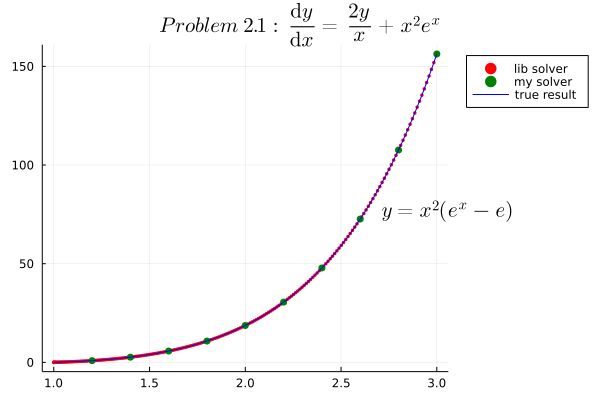

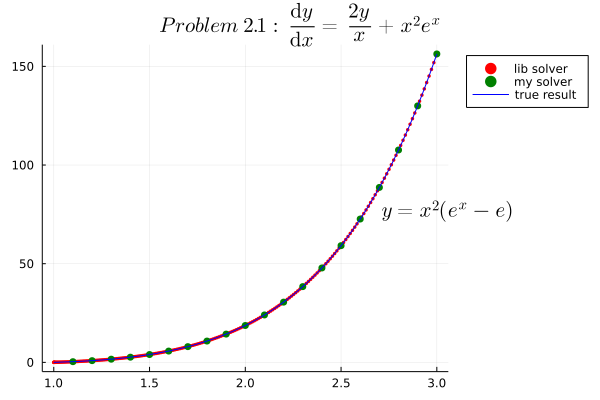

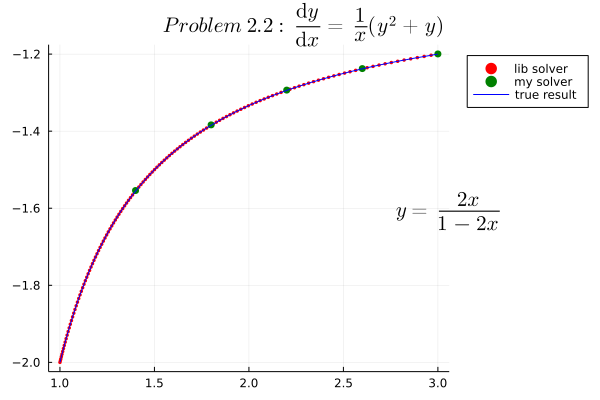

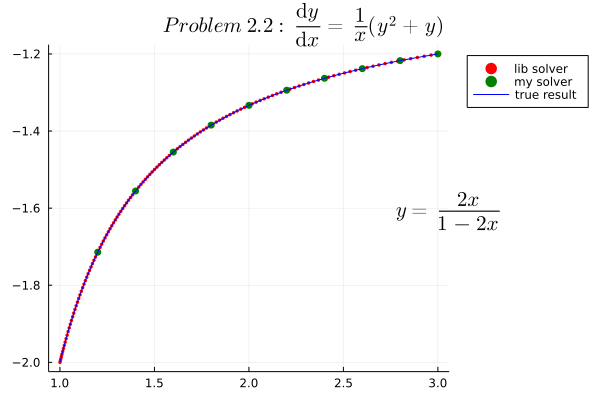

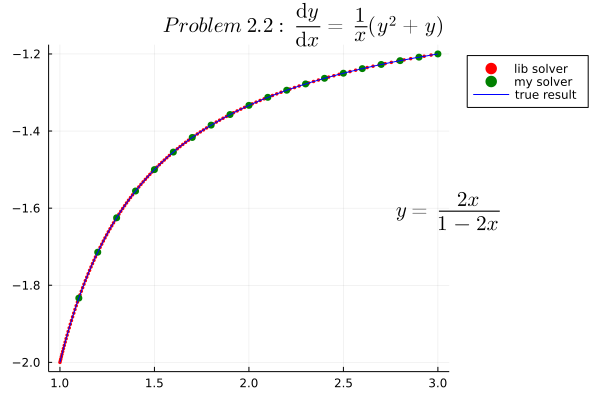


$Problem\ 2.1:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{2y}{x}+x^2 e^x$
Iternum: 5	Runge-Kutta:
x: [1.4, 1.7999999999999998, 2.1999999999999997, 2.5999999999999996, 2.9999999999999996]
y: [2.613942792503426, 10.776313166418575, 30.491654203794223, 72.58559860601221, 156.22519827584796]
Iternum: 10	Runge-Kutta:
x: [1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.4, 2.6, 2.8000000000000003, 3.0000000000000004]
y: [0.8663791119740196, 2.619740520468712, 5.719895279538559, 10.79201759748925, 18.6808523645173, 30.521598135366503, 47.83236583269365, 72.634503537672, 107.60885199118545, 156.2982574428725]
Iternum: 20	Runge-Kutta:
x: [1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000004, 1.5000000000000004, 1.6000000000000005, 1.7000000000000006, 1.8000000000000007, 1.9000000000000008, 2.000000000000001, 2.100000000000001, 2.200000000000001, 2.300000000000001, 2.4000000000000012, 2.5000000000000013, 2.6000000000000014, 2.7000000000000015, 2

In [90]:
iternums = [5, 10, 20]

f1(y, p, x) = 2 * y / x + x^2 * exp(x)
xspan = (1.0, 3.0)
# !不需要换元，也不需要改xspan，当x最左边的值确定的时候，就是初值的位置
y0 = 0.0
f2(x, y) = 2 * y / x + x^2 * exp(x)
f3(x) = x^2 * (exp(x) - exp(1))
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 2.1:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{2y}{x}+x^2 e^x", L"y=x^2(e^x - e)") # show=true, dense=true



f1(y, p, x) = (y^2 + y) / x
xspan = (1.0, 3.0)
y0 = -2.0
f2(x, y) = (y^2 + y) / x
f3(x) = 2x / (1 - 2x)
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 2.2:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{1}{x}(y^2+y)", L"y=\frac{2x}{1-2x}") # show=true, dense=true


#### 问题 3

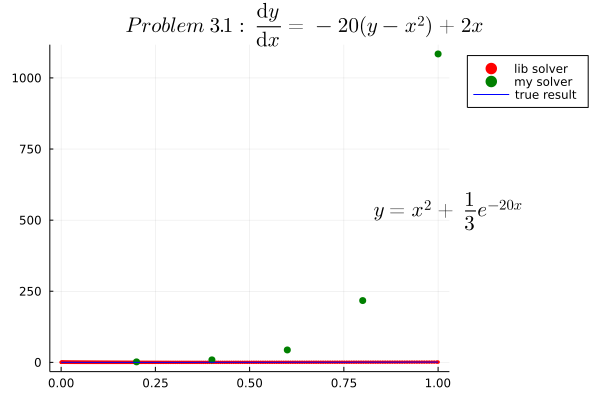

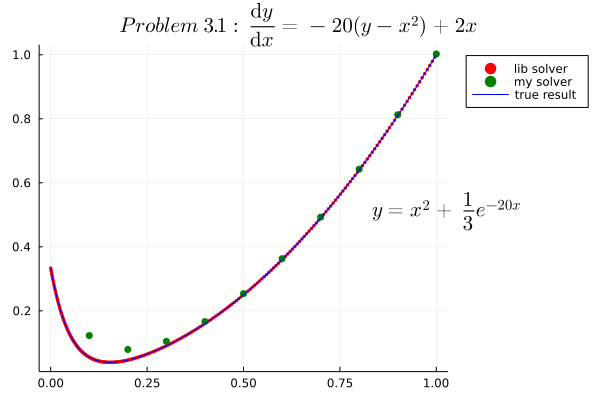

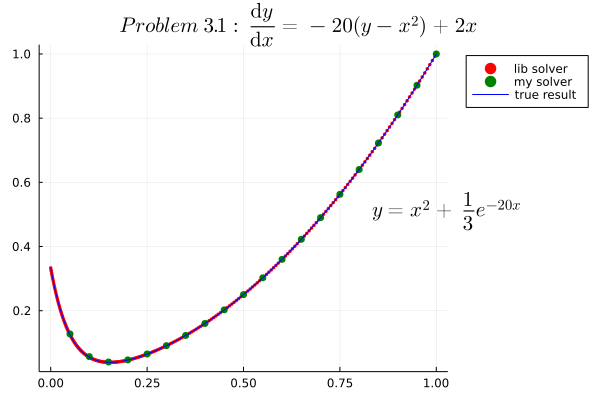

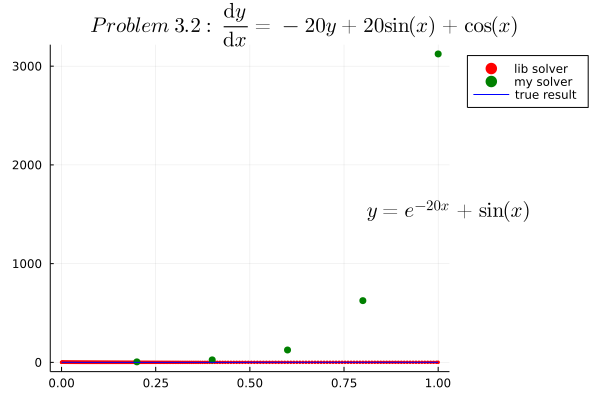

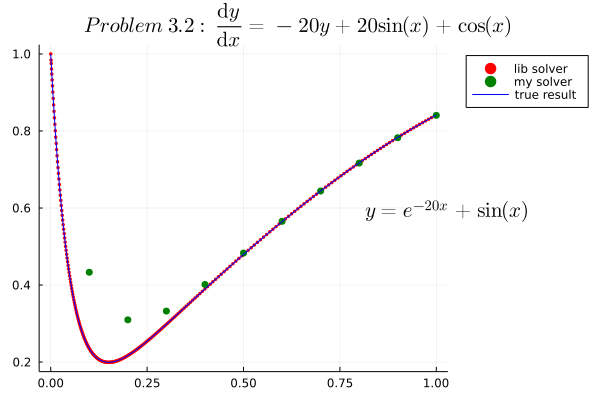

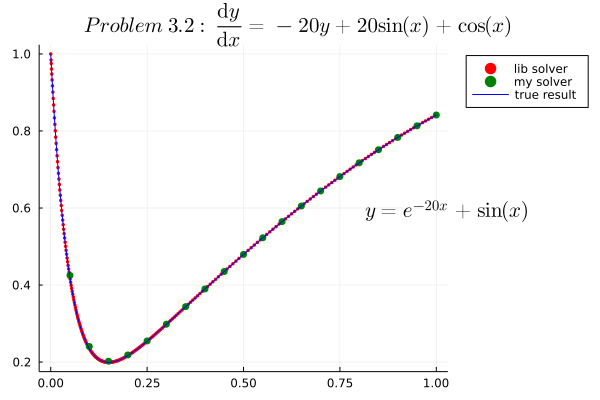

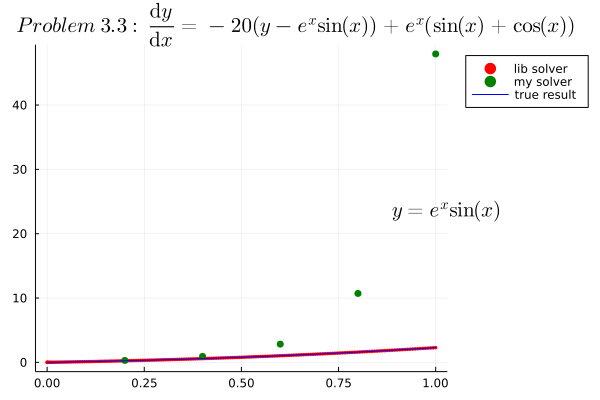

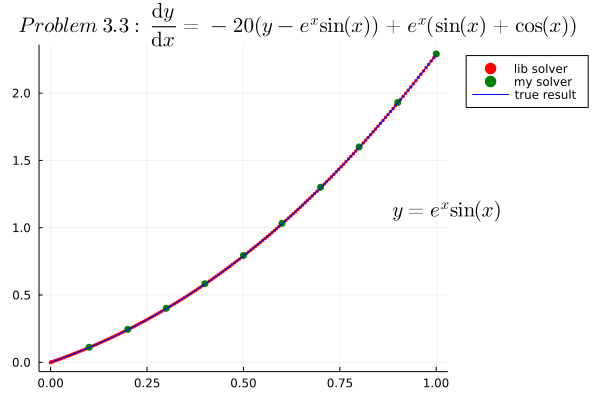

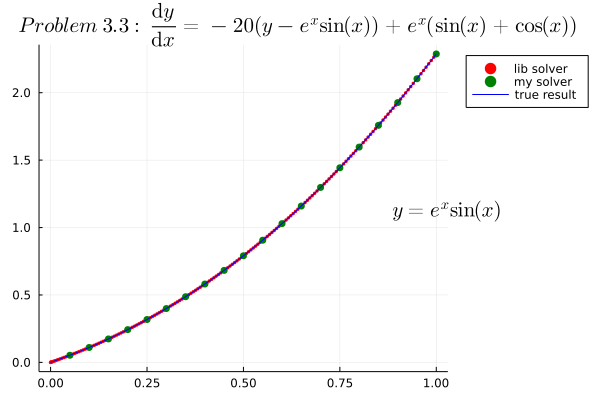


$Problem\ 3.1: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-x^2)+2x$
Iternum: 5	Runge-Kutta:
x: [0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
y: [1.7600000000000002, 8.813333333333336, 43.68000000000001, 217.29333333333338, 1084.3200000000002]
Iternum: 10	Runge-Kutta:
x: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
y: [0.12277777777777779, 0.07925925925925928, 0.10475308641975309, 0.16658436213991773, 0.25386145404663923, 0.36295381801554644, 0.4926512726718488, 0.6425504242239496, 0.8125168080746498, 1.00250560269155]
Iternum: 20	Runge-Kutta:
x: [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994, 0.5499999999999999, 0.6, 0.65, 0.7000000000000001, 0.7500000000000001, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000002]
y: [0.12755208333333334, 0.056946614583333346, 0.04015706380208334, 0.04667348225911459, 0.065054639

In [91]:
f1(y, p, x) = -20(y - x^2) + 2x
xspan = (0.0, 1.0)
y0 = 1 / 3
f2(x, y) = -20(y - x^2) + 2x
f3(x) = x^2 + 1 / 3 * exp(-20x)
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 3.1: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-x^2)+2x", L"y=x^2+\frac{1}{3}e^{-20x}") # show=true, dense=true


f1(y, p, x) = -20y + 20sin(x) + cos(x)
xspan = (0.0, 1.0)
y0 = 1.0
f2(x, y) = -20y + 20sin(x) + cos(x)
f3(x) = exp(-20x) + sin(x)
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 3.2: \frac{\mathrm{d} y}{\mathrm{d} x}=-20y+20\sin(x)+\cos(x)", L"y=e^{-20x}+\sin(x)") # show=true, dense=true


f1(y, p, x) = -20(y - exp(x)sin(x)) + exp(x) * (sin(x) + cos(x))
xspan = (0.0, 1.0)
y0 = 0.0
f2(x, y) = -20(y - exp(x)sin(x)) + exp(x) * (sin(x) + cos(x))
f3(x) = exp(x) * sin(x)
show_result(f1, f2, f3, xspan, y0, iternums, true, false, L"Problem\ 3.3: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-e^x \sin(x))+e^x (\sin(x) + \cos(x))", L"y=e^x \sin(x)") # show=true, dense=true



### 思考题


1. 对实验 1，数值解和解析解相同吗？为什么？试加以说明。
   
   是相同的，因为解析解是线性函数，能够通过所得数值解的两个点确定直线的方程，即得到解析解

2. 对实验 2，N 越大越精确吗？试加以说明。
   
   从实验的结果来看，并不是，因为当n=5的时候已经获得足够精确的数值解了，再增大n的值只是增加了计算量，却不能提高结果的精度，得不偿失
   
3. 对实验 3，N 较小会出现什么现象？试加以说明

   当n较小的时候所得数值解和正确结果相差较大，结果失真，说明在一定条件下确实需要更大的n来控制结果